In [ ]:
# 00 — Data Understanding  
### Predicting Hospital Readmission Using Machine Learning

This notebook begins the analysis by loading the dataset, inspecting its structure, 
and performing initial exploratory analysis.  
Data Source: UCI Diabetes 130-US Hospitals (ID: 296)


In [12]:
### Import Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")


In [13]:
#Load Dataset
df = pd.read_csv("diabetic_data.csv")
df.shape
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [14]:
print("Shape:", df.shape)
df.info()


Shape: (101766, 50)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-nu

In [15]:
# === Identify Numeric and Categorical Columns ===

numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df.select_dtypes(exclude=[np.number]).columns.tolist()

print("Numeric Features:", numeric_features)
print("Categorical Features:", categorical_features)


Numeric Features: ['encounter_id', 'patient_nbr', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']
Categorical Features: ['race', 'gender', 'age', 'weight', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']


In [16]:
# === Explore Target Variable: readmitted ===

df['readmitted'].value_counts(), df['readmitted'].value_counts(normalize=True)


(readmitted
 NO     54864
 >30    35545
 <30    11357
 Name: count, dtype: int64,
 readmitted
 NO     0.539119
 >30    0.349282
 <30    0.111599
 Name: proportion, dtype: float64)

In [17]:
# === Missing Values ===

print("Missing values (NaN):")
print(df.isna().sum())

print("\nMissing values represented as '?' :")
question_mark_missing = (df == "?").sum()
question_mark_missing[question_mark_missing > 0]


Missing values (NaN):
encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride               

race                  2273
weight               98569
payer_code           40256
medical_specialty    49949
diag_1                  21
diag_2                 358
diag_3                1423
dtype: int64

In [18]:
# === Replace '?' with NaN (temporary check) ===

df_temp = df.replace("?", np.nan)
df_temp.isna().sum().sort_values(ascending=False).head(15)


weight                 98569
max_glu_serum          96420
A1Cresult              84748
medical_specialty      49949
payer_code             40256
race                    2273
diag_3                  1423
diag_2                   358
diag_1                    21
patient_nbr                0
time_in_hospital           0
admission_source_id        0
num_lab_procedures         0
encounter_id               0
admission_type_id          0
dtype: int64

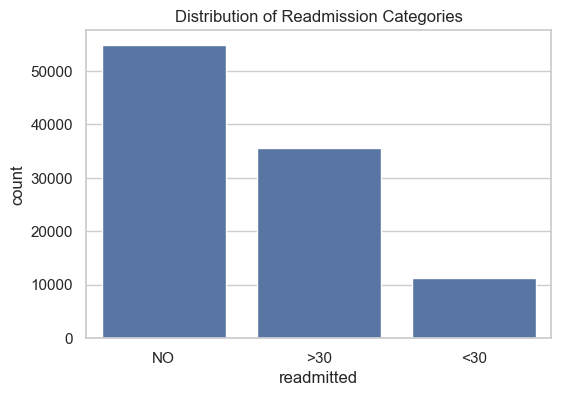

In [19]:
# === Readmission Distribution Plot ===

plt.figure(figsize=(6,4))
sns.countplot(data=df, x="readmitted")
plt.title("Distribution of Readmission Categories")
plt.show()


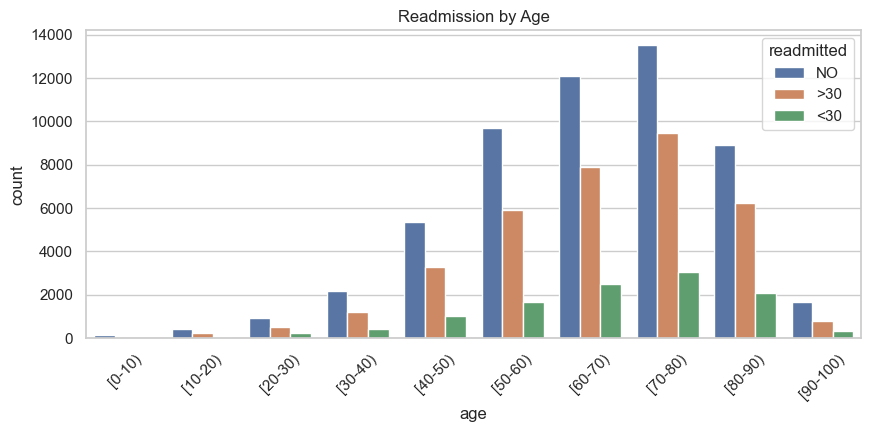

In [20]:
# === Readmission by Age ===

plt.figure(figsize=(10,4))
sns.countplot(data=df, x="age", hue="readmitted")
plt.title("Readmission by Age")
plt.xticks(rotation=45)
plt.show()


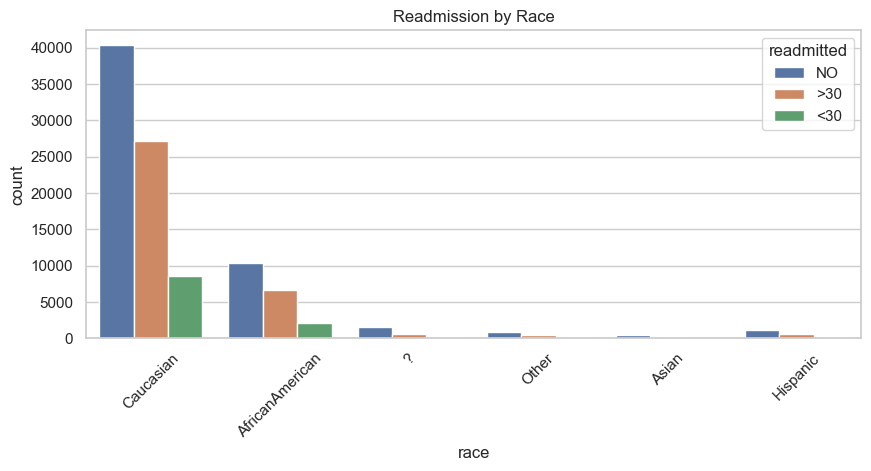

In [21]:
# === Readmission by Race ===

plt.figure(figsize=(10,4))
sns.countplot(data=df, x="race", hue="readmitted")
plt.title("Readmission by Race")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# === Notes & Preliminary Observations ===

- The dataset contains over 100k patient encounters.
- Many fields contain placeholder missing values ("?").
- Readmission is imbalanced: majority are "NO".
- Age is binned into ranges (e.g., [30-40)).
- Medication variables are categorical with values: No, Steady, Up, Down.
- Diagnosis fields are ICD-9 codes stored as strings.

These findings guide the preprocessing in Phase 2.